<a href="https://colab.research.google.com/github/mrh996/ronghui/blob/master/%E2%80%9C18040671_DL_CW2%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Coursework 2

------------------------------------------------------

**Student Name:**   <RonghuiMu>  (Student Number: <18040671> )

**Start date:** *4th March 2019*

**Due date:** *18th March 2019, 09:00 am*

------------------------------------------------------


## How to Submit

When you have completed the exercises and everything has finished running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_cw2.ipynb** before the deadline above.

Please produce a **pdf** with all the **results** (tables and plots) as well as the **answers** to the questions below. For this assignment, you don't need to include any of the code in the pdf, but answers to the questions should be self-contained and should not rely on a code reference.  Page limit: 15 pg. 

### IMPORTANT
Please make sure your submission includes **all results/answers/plots/tables** required for grading. We should not have to re-run your code.

## Q1: Memory Mechanisms (30 pts)

Before going deeper into your practical tasks, take some time to revise and make sure you understand recurrent models (Vanilla RNN) and the two of major types of recurrent memory cells you will be using in this assignment: Long-Short Term Memory Units (LSTM) first introduced by Hochreiter and Schmidhuber [1997] and the more recent Gated Recurrent Units (GRU) by Cho et al. [2014].

---------------------------------------------------

### Models
For convenience and to standardize notation please use the following notations:

#### Vanilla RNN Model Eq.

A simple RNN model we will be considering here is given by:

$$h_t = \tanh(W_h [h_{t-1}, x_t] + b_h)$$
$$o_t = \sigma(W_o h_t + b_o)$$

#### LSTM Model Eq.

The LSTM models we will be considering are given by: 
* For the input, forget and outputs gates are: 

$$f_t = \sigma(W_f [h_{t-1}, x_t] + b_f)$$
$$i_t = \sigma(W_i [h_{t-1}, x_t] + b_i)$$
$$o_t = \sigma(W_o [h_{t-1}, x_t] + b_o)$$

* The internal state $c_t$ and hidden state $h_t$ are:

$$c_t = f_t * c_{t-1} +  i_t * \text{tanh}(W_c[h_{t-1}, x_t] + b_c) $$
$$h_t = o_t * \text{tanh}(c_t)$$

#### GRU Model Eq.
The GRU models we will be considering are given by:

* The gates modulation $r_t$, $z_t$:
$$z_t = \sigma(W_z [h_{t-1}, x_t] + b_z)$$
$$r_t = \sigma(W_r [h_{t-1}, x_t] + b_r)$$

* The output and hidden state are now being given by:

$$\tilde{h}_t = \text{tanh}(W_h [(h_{t-1} * r_t), x_t] + b_h)$$
$$h_t = (1 - z_t)*\tilde{h}_t + z_t * h_{t-1}$$

---------------------------------
### Simple Memory Task Description
Consider the following memory task: Given an input sequence of $n$ numbers, we would like a system that, after reading this sequence (one number at a time) will always return the first number in the sequence. That is given an input sequence: $(x_1, x_2, \cdots x_n)$, $x_i \in \mathbb{R}$ the system has to return, at time $t=n$ after 'reading' the last input $x_n$, the first input $x_1$.

---------------------------------

###Questions
Now consider the following questions:

1. Given the task above, consider the above recurrent models (RNNs/LSTMs/GRUs). Which of these arhitectures can (theoretically) perfom the task above? In answering this questions, please consider a simple one-layer model of RNNs/GRU/LSTM with a one-dimensional input $x_t$, a $32$-dim hidden and output layer, followed by a transformation to a one-dimensional final output which should predict $x_0$. \\
Whenever the answer is positive, give the gates' activations and weigths that will produce the desired behaviour. Whenever the answer is no, prove that there exists no such parameters that an arbitrary input sequence can be transformed to produce the first symbol read.  [15 pts]

2. How does the answer change when now the desired output, after reading the whole sequence, is the 3rd input $x_3$ rather than $x_1$? Assume here $n>3$. [5 pts]

3. How does the answer change when you restrict the inputs to be integers between $0$ and $31$ and we consider representing these inputs as a one-hot vectors uniquely representing these numbers? That is: for $x_i=0$, the input of the network would be $\tilde{x}=[1,0,0,
\cdots, 0]$, for $x_i=1$, the input of the network would be $\tilde{x}=[0,1,0,0,\cdots, 0]$ and now predicted output should be $\tilde{x}$. [5 pts]

4. Are GRUs a special case of LSTMs? If so, give the expression of the GRU gates in term of LSTM's gates ($o_t, i_t, f_t$). If not, give a counter-example. This is a general question, not specific to the task above, although you can draw intution from the above questions. Assume here the same input. [5 pts]

**Word limit: ** 1500 words or less





**Answers:** 

###1.  
* The ***RNN cannot*** perform the task 
If the input sentence is very long.The RNN architecture can only remember the  first input with a length shoeter than  32 as the number of hidden units is 32. If the length is longer 32, it will rewrite the memory and forget the first input.  . That because the output is \\
$$output_t{RNN} = \ f (W_o*\ f(W_h [h_{t-1}, x_t] + b_h)+b_o)$$  We can change the weights to define how much information can be kept from last hidden sates and put the current input combined with the previous information in the new hidden state. Therefore, if we want to keep the first input, we need a sentence of length than less 32 words and set the hidden weights as$$
  \begin{matrix}
   0 & 0 & 0...&0&0 &1 \\
   1& 0 & 0...&0&0&0 \\
   0 & 1 & 0...&0&0&0\\
   0&0&1...&0&0&0\\
   ...\\
   0&0&0..&1&0&0
  \end{matrix} \tag{$$wh(32$\times$33)}
$$ 
If the length is longer than 32, the first input will be removed fron the hidden state, so It is not possible to complete the task for an arbitrary input sequence. 
* For the ***LSTM*** models. \\
we can define  forget gate to be 1, the previous information will be stored in the memory. The input gate can be set to 1 first and then 0  to allow the first input go to the cell state and do not input other words.Therefore, the **sigmoid **is chosen for the activations for **forget gate and input gate**.The weights in the forget gate can be set to  $$
  \begin{matrix}
   0 & 0...&0 &0 \\
   0& 0 ...&0&0 \\
   ...\\
   0& 0 ...&0&0\\
  0&0...&0&0
  \end{matrix} \tag{$W_f$(32$\times$33)}
$$  and the bias is $b_f=50$. The output of forget gate will be 1 so the gate is always open. \\
Weights for the input gate can be $$
  \begin{matrix}
   0 & 0&50&-1000...&0 &0 \\
   0& 0&50&-1000 ...&0&0 \\
    ...\\
   0& 0&50&-1000 ...&0&0\\
   0&0&50&-1000...&0&0
  \end{matrix} \tag{$W_i$(32$\times$33)}
$$the bias $b_i=0$. \\
Set the initial input hidden state to be $$h_0=[0,0,1,0...0]   shape (32\times1) $$ and initial $c_0=[0,0,...,0]$ Therefore, the first $i_1=[1,...1]$ and then the second $i_2=[0,.....,0]$. The input gate will open firstly and then close. \\
To output the exact value of x1 , the activations of **internal state and hidden state** should be **ReLU** and the weights in the internal state should be $$
  \begin{matrix}
   0 & 0&0...&0 &1 \\
   0& 0 &0...&0&-1 \\
   0& 0 &1...&0&0\\
   ...\\
   0&0&1...&0&0
  \end{matrix} \tag{$W_c$(32$\times$33)}
$$set bias $b_c=0$. The output of theinternel state $c_1 $ is $$
  \begin{matrix}
   |x1| & &0  \\
   0& or&|x1| \\
   ...\\
   1& &1\\
   1&&1
  \end{matrix} \tag{$c_1$(32$\times$1)}
$$   To output the x1 in output gate, the **output gate** should be 1(open). It can be a **sigmoid** activation with weights $$
  \begin{matrix}
   0 & 0...&0 &0 \\
   0& 0 ...&0&0 \\
   ...\\
   0& 0 ...&0&0\\
   0&0...&0&0
  \end{matrix} \tag{$W_0$(32$\times$33)}
$$  and $b_o=50$The activations for the hidden state should be **ReLU** which gives $$h_t = o_t *ReLu(c_1)$$ As $c_1$ is the output of a Relu, in the outputgate the output will always be $c_1$. \\
In the trasformation process, set the weights $W_t$ to$$
  \begin{matrix}
   1 \\
   -1 \\
   ...\\
   0\\
   0
  \end{matrix} \tag{$W_t$(32$\times$1)}
$$, and bias is 0. Therefore, if the x1 is in the first position of $c_1$,it is positive;if it on the second position,it is negative and need to times -1 to output. The output is$W_t $$\times$$ h_T+b_t=x_1$
* For the ***GRU*** \\
we need to set the update gate Z to 1 to remeber the previous value.Therefore, the  activations of the **update gate** is **sigmoid** and the weights in update gate is $$
  \begin{matrix}
   0 & 0&50...&0 &0 \\
   0& 0&50 ...&0&0 \\
   ..& .. ...&..&..\\
   0&0&50...&0&0
  \end{matrix} \tag{$W_z$(32$\times$33)}
$$ and bias $bz=0.001$ .The first $ z_1 $ is 0. Then, we can define the activations of the **hidden gate** to be **ReLU** . The weights in the hidden state can be set as$$
  \begin{matrix}
   0 & 0&0...&0 &1 \\
   0& 0&0 ...&0&-1 \\
   0& 0&1 ...&0&0\\
   ...\\
   0&0&1...&0&0
  \end{matrix} \tag{$W_h$(32$\times$33)}
$$and the bias $b_h=0$ \\
The output of the hidden gate $\tilde{h}_1 $ can be $$
  \begin{matrix}
  | x1| & &0  \\
   0& or&|x1| \\
   1& &1\\
   ...\\
   1&&1
  \end{matrix} \tag{$\tilde{h}_1$(32$\times$1)}
$$ For the rest gate, it is expected to be open first and then close. Therefore, the **sigmoid ** activation is chosen, and the weights can be $$
  \begin{matrix}
   0 & 0&50&-1000...&0 &0 \\
   0& 0&50&-1000 ...&0&0 \\
    ...\\
   0& 0&50&-1000 ...&0&0\\
   0&0&50&-1000...&0&0
  \end{matrix} \tag{$W_r$(32$\times$33)}
$$the bias $b_r=0$. \\
Initializing$h_0=[0,0,1,0..0]$, we can get the output as $$h_1 = (1 - 0)*\tilde{h}_1 + 0 * h_{0}=\tilde{h}_1$$ When the second word input, the output of $z_t$ will be 1, therefore, $$h_t =  0*\tilde{h}_t + 1 * h_{t-1}=\tilde{h}_1$$ \\
In the transformation process, set the weights $W_t$ to$$
  \begin{matrix}
   1 \\
   -1 \\
   ...\\
   0\\
   0
  \end{matrix} \tag{$W_t$(32$\times$1)}
$$, and bias $b_t$ is 0.

###2
If change the input to be remembered is the 3rd one:
* **LSTM**
To output the 3rd one, we need to set the forget gate to close until the third one input, then open it. For the input gate, it should open until read the 3rd input and then close it.Based on the idea above, the activation of forget gate is changed to **ReLU** and the weights  should be  $$
  \begin{matrix}
   0 & 0...& 1 (11th)&0&... &0 \\
   0 & 0...& 1 (11th)&0&... &0  \\
   ...\\
  0 & 0...& 1 (11th)&0&... &0 \\
 0 & 0...& 1 (11th)&0&... &0 
  \end{matrix} \tag{$W_f$(32$\times$33)}
$$  and the bias is $b_f=0$. \\
The activation of input gate is also changed to **ReLU** and the weights are changed to $$
  \begin{matrix}
   0 & 0&0&-5(11th)&0...&0 &0 \\
   0& 0&0&-5(11th) &0...&0&0 \\
    ...\\
  0& 0&0&-5(11th) &0...&0&0 \\
  0& 0&0&-5(11th) &0...&0&0 
  \end{matrix} \tag{$W_i$(32$\times$33)}
$$the bias $b_i=1$. \\
The cell state actication is still **ReLU**, but the weights are changed to $$
  \begin{matrix}
   0 & 0&0...&0 &0 &0 &1 \\
   0& 0 &0...&0&0 &0 &-1 \\
   1& 0 &0...&0&0 &0 &0\\
   0& 1 &0...&0&0 &0 &0\\
    0& 0 &1&0...&0 &0 &0\\
   ...\\
    0&0 ...&0 & 1(10th)&0 &0..&0\\
   0&0...&0&0 &1(11th)&0..&0\\
    0&0...&0&0 &0&0..&0\\
   ...\\
    0&0...&0&0 &0&0..&0
  \end{matrix} \tag{$W_c$(32$\times$33)}
$$set bias $b_c=0$ 
Initializing the $h_0=[0,0,0,0,1(5th),0,0,..0]$(32$\times$1), $c_0=0$ and the setting for the output gate does not change which make it always be open. The transformation weights are changed to $W_t$ to$$
  \begin{matrix}
   0 \\
   0 \\
   0\\
   0\\
   1\\
   -1\\
   0\\
   ...\\
   0
  \end{matrix} \tag{$W_t$(32$\times$1)}
$$, and bias $b_t$ is 0. \\
During this process, the hidden states are: 
$$
\begin{align*}
\begin{bmatrix}
    x_{1}      \\
    -x_{1}\\     
    0\\
    \dots \\
    1(7th)\\
   0    \\
   \dots\\
   0
\end{bmatrix}
 \rightarrow
\begin{bmatrix}
    x_{1}      \\
    -x_{1}\\ 
     x_{2}      \\
    -x_{2}\\ 
    0\\
    \dots \\
    1(9th)\\
   0    \\
   \dots\\
   0
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    x_{1}      \\
    -x_{1}\\ 
     x_{2}      \\
    -x_{2}\\ 
     x_{3}      \\
    -x_{3}\\ 
    0\\
    \dots \\
    1(11th)\\
   0    \\
   \dots\\
   0
\end{bmatrix}
\end{align*}
$$
The $h_3$ will be the last state that the model output.
* As for the **GRU** model:
Set the update gate always open, the weights of reset gate is  $$
  \begin{matrix}
   0 & 0...&0 &0 \\
   0& 0 ...&0&0 \\
   ...\\
   0& 0 ...&0&0\\
   0&0...&0&0
  \end{matrix} \tag{$W_r$(32$\times$33)}
$$  and $b_r=50$ \\
The update gate should be open for the first three inputs and then close ($z_4=0$). Therefore, the activation can be ** ReLU** and the weights are:$$
  \begin{matrix}
   0 & 0...& 1 (11th)&0&... &0 \\
   0 & 0...& 1 (11th)&0&... &0  \\
   ...\\
  0 & 0...& 1 (11th)&0&... &0 \\
 0 & 0...& 1 (11th)&0&... &0 
  \end{matrix} \tag{$W_z$(32$\times$33)}
$$  and the bias is $b_z=0$. \\
 For the hidden state, the activation is still **ReLU**, weights are changed to $$
  \begin{matrix}
   0 & 0&0...&0 &0 &0 &1 \\
   0& 0 &0...&0&0 &0 &-1 \\
   1& 0 &0...&0&0 &0 &0\\
   0& 1 &0...&0&0 &0 &0\\
    0& 0 &1&0...&0 &0 &0\\
   ...\\
    0&0 ...&0 & 1(10th)&0 &0..&0\\
   0&0...&0&0 &1(11th)&0..&0\\
    0&0...&0&0 &0&0..&0\\
   ...\\
    0&0...&0&0 &0&0..&0
  \end{matrix} \tag{$W_h$(32$\times$33)}
$$set bias $b_h=0$ \\
 
Initializing the $h_0=[0,0,0,0,1(5th),0,0,..0]$(32$\times$1), $c_0=0$ and the setting for the output gate does not change which make it always be open. The transformation weights are changed to $W_t$ to$$
  \begin{matrix}
   0 \\
   0 \\
   0\\
   0\\
   1\\
   -1\\
   0\\
   ...\\
   0
  \end{matrix} \tag{$W_t$(32$\times$1)}
$$, and bias $b_t$ is 0. \\
Therefore, the output of GRu will bw the same as the LSTM above.

###3
If the input changes to the one-hot vector, the gate activations do not change. The weights are changed to be a (32$\times$64 ) matrix. \\
* For the **LSTM**: 
there are 31 columns of zeros added at the end in the** forget gate** . For the **input gate**, the weights should be changed to$$
  \begin{matrix}
   -1000 & 50&0...&0 &0 \\
   -1000& 50&0 ...&0&0 \\
   -1000& 50&0 ...&0&0\\
   ...\\
   -1000&50&0...&0&0
  \end{matrix} \tag{$W_i$(32$\times$64)}
$$ $b_i=0$As the  initial input hidden state is still $h_0=[0,1,0...0]$ and initial $c_0=0$ The first input gate value is $i_1=[1,...1]$ and then the next hidden state will be the same as forst input $h_1=[1,0,0...0]$,so the second input gate is $i_2=[0,.....,0]$. To make the first output hidden to be the same as $x_1$, the weights in the **internal state** should be$$
  \begin{matrix}
   0 & 0&0...&0 &1(33rd)&0...&0\\
   0& 0&0 ...&0&0&0...&0 \\
   0& 0&0 ...&0&0&0...&0\\
   ...\\
   0&0&0...&0&0&0...&0
  \end{matrix} \tag{$W_c$(32$\times$64)}
$$ with $b_c=0$The output of theinternel state $c_1 $ is $$
  \begin{matrix}
   1  \\
   0 \\
   ...\\
   0\\
   0
  \end{matrix} \tag{$c_1$(32$\times$1)}
$$ It wiil be output with a **ReLU** activations in the hidden state. \\
* For **GRU** model : 
The weights in the **update gate ** is changed to  $$
  \begin{matrix}
   50& 0...&0 &0 \\
   50 &0 ...&0&0 \\
   ..& .. ...&..&..\\
   50&0...&0&0
  \end{matrix} \tag{$W_z$(32$\times$64)}
$$ and the bias$b_z$=0.001. With Initializing $h_0$ changed to [0,0,0,...0], the update gate will be 0 at first, and then will be 1 after reading the first input. \\
Set the update gate always open, the weights of reset gate is  $$
  \begin{matrix}
   0 & 0...&0 &0 \\
   0& 0 ...&0&0 \\
   ...\\
   0& 0 ...&0&0\\
   0&0...&0&0
  \end{matrix} \tag{$W_r$(32$\times$33)}
$$  and $b_r=50$ \\
The weights in the ** hidden state** is changed to $$
  \begin{matrix}
   0 & 0&0...&0 &1(33rd)&0...&0\\
   0& 0&0 ...&0&0&0...&0 \\
   0& 0&0 ...&0&0&0...&0\\
   ...\\
   0&0&0...&0&0&0...&0
  \end{matrix} \tag{$W_h$(32$\times$64)}
$$ and the bias $b_h=0$The output of the hidden gate $\tilde{h}_1 $ is$$
  \begin{matrix}
   1  \\
   0 \\
   0\\
   ...\\
   0
  \end{matrix} \tag{$\tilde{h}_1$(32$\times$1)}
$$ Then the update gate changed from 0 to 1 and the model will always  output the first hidden state.

###4
*  No. GRU is not a special case for the LSTM. The counter example is that: \\
In the structure of LSTM, set $f_t=z_t$, and $i_t=1-z_t$, output gate is set to be open ($o_t=1$).The output equation of LSTM became : 
$$c_t = z_t * c_{t-1} +  (1-z_t )* \text{tanh}(W_c[h_{t-1}, x_t] + b_c) $$
$$h_t = \text{tanh}(c_t)$$  
compared to the equation of GRU:
$$h_t = (1 - z_t)*\text{tanh}(W_h [(h_{t-1} * r_t), x_t] + b_h) + z_t * h_{t-1}$$
Only when the $r_t==1 $and the output activation is a linear function  in the GRU model  , these two models' outputs are equal. As there are many additional conditions added to the GRU model, it not a special case of the LSTM. 







In [0]:
#@title IMPORTS
import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Q2: Training Memory Models (33 pts)
Let us now investigate in pratice the above problem. And see how each these models does in learning the simple memory task proposed in Q1. For the purposed of this exercise we consider as inputs sequences of length $n=10$, with every input $x_i \sim \mathcal{N(0,1)}$ drawn (independently) from a unit Gaussian.


1. **[5 pts]** Consider one of the models in **Q1.1** that you now know can represent a solution to our simple memory task. For this model, you know at least one set of weights what should implement exactly the prediction of the first read symbol $x_1$. Implement this model in tensorflow, with the fixed set of weights you previously inferred and show emperically that this indeed solves our task. \\
  i) Report the (empirical) mean-squared error over $300$ randomly generated sequences. \\
  ii) Is this set of weights a fix point for the learning? 

**Answers:**

ii) The mean square-errors are zeros, so the weights are fixed points for learning.


In [0]:
tf.reset_default_graph()
# YOUR CODE HERE
tf.reset_default_graph()
SEQ_LENGTH = 10 
HIDDEN_UNITS = 32 
index_input_to_remember = 0
initializer = tf.contrib.layers.xavier_initializer()
# dummy input sequence
zeros =tf.zeros((HIDDEN_UNITS,1))
fifty=tf.ones((HIDDEN_UNITS,1))*50
thousand=tf.ones((HIDDEN_UNITS,1))*-1000
onezero=tf.concat([tf.ones((1,1)),tf.ones((1,1))*-1,tf.zeros((30,1))],axis=0)
zeroone=tf.concat([tf.zeros((2,1)),tf.ones((30,1))],axis=0)
errors=[]
for i in range(300):
    dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 
    dummy_input=tf.reshape(dummy_input,[SEQ_LENGTH,1])
    
    Wi=tf.concat([zeros,zeros,fifty,thousand,tf.zeros((HIDDEN_UNITS,29))],axis=1)

    bi = tf.ones((HIDDEN_UNITS,1))
    # forget gate
    Wf = tf.zeros([32, 33])
    bf =fifty
 # output gate
    Wo= Wf
    bo= bf
# new memory Cell
    
    Wc =tf.concat([tf.zeros([32,2]),zeroone,tf.zeros([32,29]),onezero],axis=1) 

    bc= zeros

    Wt = tf.concat([tf.ones((1,1)),tf.ones((1,1))*-1,tf.zeros((1,30))],axis=1)

    bt= tf.zeros((1,1))

    time_steps =dummy_input.shape[0]
    hidden=tf.concat([tf.zeros((2,1)),tf.ones((1,1)),tf.zeros((29,1))],axis=0)
    c_prev=np.zeros((32,1))
    for j in range(time_steps):
        x=tf.reshape(dummy_input[j],[1,1])
        xn=tf.concat([hidden,x],0)
    #Input Gate
        i = tf.sigmoid(tf.matmul(Wi,xn) + bi)        
    #Forget Gate
        f = tf.sigmoid(tf.matmul(Wf,xn) + bf)    

    #Output Gate
        o = tf.sigmoid(tf.matmul(Wo,xn) + bo)    
    
    #New Memory Cell
        c_= tf.nn.relu(tf.matmul(Wc,xn) + bc) 

    #Final Memory cell
        c= f*c_prev +i* c_ 
        c_prev=c
    #Current Hidden state
        hidden = o*tf.nn.relu(c)
    output= tf.matmul(Wt,hidden)+bt
    error=tf.reduce_mean(tf.square(output[0]-dummy_input[0]))
    with tf.Session() as sess:
        error=error.eval()  
    errors.append(error)
print(errors)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

2. **[10 pts] ** Consider the following models, with standard initializations (tensorflow defaults), except a few bias terms as specified below:
  * MM1: RNN bias term $b_h = 0$
  * MM2: LSTM with $b_f = 1$ 
  * MM3: LSTM with $b_f = 5$
  * MM4: LSTM with $b_f = -2$
  * MM5: GRU with  $b_z = 5$

  Implement each of these models in tensorflow. Given the initialization conditions above, compute and plot the following gradients as a function of time: the gradient of the last hidden unit $h_T$, where $T=n$ which respect to the previous hidden units $h_t$ for $t < T$.

  $$ \left\Vert \frac{\partial h_T}{\partial h_t} \right\Vert_1 = \sum_i \left| \frac{\partial h_T[i]}{\partial h_t} \right|$$  
  and the gradient of the loss which respect to the hidden units over time $h_t$, for $t<T$:
    $$ \left\Vert \frac{\partial Loss}{\partial h_t} \right\Vert_1$$  
where the $Loss$ we are considering here is the mean-squares error: $Loss(\textbf{x}) = (x_1-y_T)^2$ where $y_T$ is the output of the reccurent model at time $T=n$ after reading the last input $x_n$.

  **[3 pts] ** Now consider an additional model:
  * MM0: LSTM with $b_f = 1000$ and $b_c = -50$. 

  Report and plot the same gradients as above. What do you observe? What does this model correspond to? (Hint: How does the information flow when processing a sequence). What will be its behaviour in training?

  **[5 pts] ** Increase the length of the input sequence to $n=25$. How do the above gradients change? (you can see by an argument or by running the experiments and explain what you see). How do you expect the training to progress in all of these models MM0-5?  

**Answers:**

In [0]:
def RNN(input_size, hidden_layer_size,initializer,x,bh=None):
    
    # Initialization of given values
    
    nx = x[0,:,:]
    
    # Weights and Bias for input and hidden tensor

    # hidden layer
    Wh = tf.Variable(initializer([hidden_layer_size+input_size, hidden_layer_size]))
    bh = tf.Variable(initializer([hidden_layer_size]))
    
    Wo = tf.Variable(initializer([hidden_layer_size, hidden_layer_size]))
    bo = tf.Variable(initializer([hidden_layer_size]))
    # Processing inputs to work with scan function
    hidden= tf.zeros([input_size, hidden_layer_size])   
    # Unroll the system
    time_steps = nx.shape[0]
    hiddens,h_s = [],[]
    for j in range(time_steps):
      x=tf.reshape(nx[j],[1,1])
      xx=tf.concat([hidden,x],1)
     
   
      h_= tf.nn.tanh(tf.matmul(xx,Wh) + bh) 
      hidden= tf.sigmoid(tf.matmul(h_,Wo) +bo)
     
      hiddens.append(hidden)
      h_s.append(h_)
     
    return hiddens,h_s

In [0]:
def LSTM( input_size, hidden_layer_size,initializer,x,bf=None,bc=None):
    nx = x[0,:,:]
    # Weights and Bias for input and hidden tensor
    # input gate
    Wi = tf.Variable(initializer([hidden_layer_size+input_size, hidden_layer_size]))
    bi = tf.Variable(initializer([hidden_layer_size]))
    
    Wo = tf.Variable(initializer([hidden_layer_size+input_size, hidden_layer_size]))
    bo = tf.Variable(initializer([hidden_layer_size]))

    # forget gate
    Wf = tf.Variable(initializer([hidden_layer_size+input_size, hidden_layer_size]))
    if bf ==None :
             bf = tf.Variable(initializer([hidden_layer_size]))        

   
    # new memory Cell
    Wc = tf.Variable(initializer([hidden_layer_size+input_size, hidden_layer_size]))
    
    if bc == None:
        
        bc= tf.Variable(initializer([hidden_layer_size]))       
    c_prev= tf.zeros([input_size, hidden_layer_size])
    hidden= tf.zeros([input_size, hidden_layer_size])
    hiddens,cn = [],[]
    time_steps = nx.shape[0]
  # Function for LSTM cell.
    for j in range(time_steps):
        x=tf.reshape(nx[j],[1,1])
        xn=tf.concat([hidden,x],1)
    #Input Gate
        i = tf.sigmoid(tf.matmul(xn,Wi) + bi)        
    #Forget Gate
        f = tf.sigmoid(tf.matmul(xn,Wf) + bf)    

    #Output Gate
        o = tf.sigmoid(tf.matmul(xn,Wo) + bo)    
    
    #New Memory Cell
        c_= tf.nn.tanh(tf.matmul(xn,Wc) + bc) 
        if j==0:
            c2=c_
    #Final Memory cell
        c= f*c_prev +i* c_ 
        c_prev=c
    #Current Hidden state
        hidden = o*tf.nn.tanh(c)
        hiddens.append(hidden)
        cn.append(c)
    return hiddens,cn



In [0]:
def GRU( input_size, hidden_layer_size,initializer,x,bz=None):
    
    # Initialization of given values
    x = tf.transpose(x,[1,0,2])
    
    nx = x[0,:,:]
    
    # Weights and Bias for input and hidden tensor
    # update gate
    Wz = tf.Variable(initializer([input_size, hidden_layer_size]))
    Uz = tf.Variable(initializer([hidden_layer_size, hidden_layer_size]))
    if bz ==None :
        bz = tf.Variable(initializer([hidden_layer_size]))

    # reset gate
    Wr = tf.Variable(initializer([input_size,hidden_layer_size]))
    Ur = tf.Variable(initializer([hidden_layer_size, hidden_layer_size]))
    br = tf.Variable(initializer([hidden_layer_size]))        

    # hidden layer
    Wh = tf.Variable(initializer([input_size, hidden_layer_size]))
    Uh = tf.Variable(initializer([hidden_layer_size, hidden_layer_size]))
    bh = tf.Variable(initializer([hidden_layer_size]))        

   
    # Processing inputs to work with scan function
    hidden= tf.zeros([input_size, hidden_layer_size])
    # Unroll the system
    time_steps = x.shape[0]
    hiddens,h_s = [],[]
    for j in range(time_steps):
        xn=x[j]
      #reset Gate
        r = tf.sigmoid(tf.matmul(xn,Wr)+tf.matmul(hidden,Ur) + br)    

    #upset Gate
        z = tf.sigmoid(tf.matmul(xn,Wz)+tf.matmul(hidden,Uz) + bz)    
       
  
    # output
        h_= tf.nn.tanh(tf.matmul(xn,Wh)+tf.matmul(hidden*r,Uh) + bh) 
    ##Current Hidden state
        hidden= z*hidden + (1-z)*h_  
        hiddens.append(hidden)
        h_s.append(h_)

    return hiddens,h_s
      


Instructions for updating:
Colocations handled automatically by placer.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


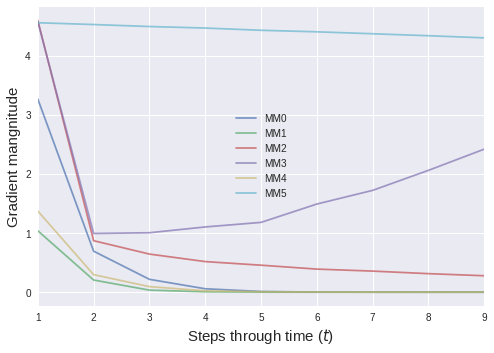

In [0]:
tf.reset_default_graph()
SEQ_LENGTH = 10 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 0 #@param
derivative = 'loss' #@param
initializer = tf.contrib.layers.xavier_initializer()
# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 
inputs=tf.reshape(dummy_input,[1,SEQ_LENGTH,1])
#inputs=tf.unstack(dummy_input,axis=0)
rnn_types=rnn_types = {
    'MM0': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=1000,bc=50),
    'MM1': RNN(1, HIDDEN_UNITS,initializer,inputs,bh=0),# constructor for MM1
    'MM2': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=1,bc=None),
    'MM3': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=5,bc=None),
    'MM4': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=-2,bc=None),
    'MM5': GRU(1, HIDDEN_UNITS,initializer,inputs,bz=5),
    }
#rnn_types=rnn_types = {
 #  'MM1': tf.contrib.rnn.BasicLSTMCell( HIDDEN_UNITS,forget_bias=10)}
   
depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]

grad_norms = {rnn_type: [] for rnn_type in rnn_types}

time_step=tf.shape(dummy_input)[0]

for rnn_type in rnn_types:
  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  rnncell=rnn_types[rnn_type]
  
  rnn_output,state= rnncell
 
  
  #init_state=basic_cell.zero_state(1,dtype=tf.float32)
  #rnn_output, states = tf.nn.static_rnn(cell=rnncell, initial_state=init_state,inputs=inputs,dtype=tf.float32)
  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  
  rnn_hidden_at_time=rnn_output
  
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
 
  last_hidden =rnn_output[-1]
 
  hidden_last_output =tf.reshape(rnn_hidden_at_time[-1],[1,HIDDEN_UNITS])
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b

  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember ]))
  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):

    if derivative  == 'loss':

      current_gradient = tf.gradients(

        loss, 
        
        rnn_hidden_at_time[i],
        
      )
      
    else:
      current_gradient = tf.gradients(

        last_hidden, 

        rnn_hidden_at_time[i],   
      )

    gradients_at_time.append(current_gradient)

  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)

  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient mangnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

Tensor("mul_29:0", shape=(1, 32), dtype=float32)
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Tensor("Sigmoid_39:0", shape=(1, 32), dtype=float32)
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Tensor("mul_59:0", shape=(1, 32), dtype=float32)
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Tensor("mul_89:0", shape=(1, 32), dtype=float32)
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Tensor("mul_119:0", shape=(1, 32), dtype=float32)
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Tensor("add_289:0", shape=(1, 32), dtype=float32)
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done run

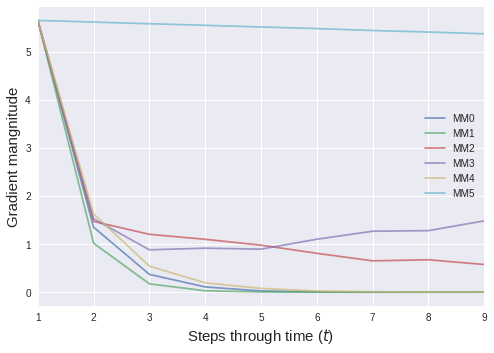

In [0]:
tf.reset_default_graph()
SEQ_LENGTH = 10 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 0 #@param
derivative = 'Last Hidden Unit' #@param
initializer = tf.contrib.layers.xavier_initializer()
# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 
inputs=tf.reshape(dummy_input,[1,SEQ_LENGTH,1])
#inputs=tf.unstack(dummy_input,axis=0)
rnn_types=rnn_types = {
    'MM0': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=1000,bc=50),
    'MM1': RNN(1, HIDDEN_UNITS,initializer,inputs,bh=0),# constructor for MM1
    'MM2': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=1,bc=None),
    'MM3': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=5,bc=None),
    'MM4': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=-2,bc=None),
    'MM5': GRU(1, HIDDEN_UNITS,initializer,inputs,bz=5),
    }
#rnn_types=rnn_types = {
 #  'MM1': tf.contrib.rnn.BasicLSTMCell( HIDDEN_UNITS,forget_bias=10)}
   
depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]
grad_norms = {rnn_type: [] for rnn_type in rnn_types}

time_step=tf.shape(dummy_input)[0]

for rnn_type in rnn_types:
 
  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  rnncell=rnn_types[rnn_type]
  
  rnn_output,state= rnncell
  #init_state=basic_cell.zero_state(1,dtype=tf.float32)
  #rnn_output, states = tf.nn.static_rnn(cell=rnncell, initial_state=init_state,inputs=inputs,dtype=tf.float32)
  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  
  rnn_hidden_at_time=rnn_output
  
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
  #rnn_output=tf.convert_to_tensor(rnn_output)
  
  last_hidden =rnn_hidden_at_time[-1]
  print(last_hidden)
  hidden_last_output =tf.reshape(rnn_hidden_at_time[-1],[1,HIDDEN_UNITS])
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b

  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember ]))
  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):

    if derivative  == 'loss':

      current_gradient = tf.gradients(

        loss, 
        
        rnn_hidden_at_time[i],
        
      )
      
    else:
      current_gradient = tf.gradients(

        last_hidden, 

        rnn_hidden_at_time[i],   

      )

    gradients_at_time.append(current_gradient)

  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)

  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient mangnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

# **Answers 2.2:**


* As we can see from above graphs,  the MM0 has highest gradient magnitude at t=1, and then it had a sharp decreasing from t=1 to t=2.From t=3, it is close to 0 and stable at 0.This behaviour means that the loss and last output hidden did not related to the first step.

* With bf=1000  the output of remeber gate will be close to 1and the cell memory will focus on the previous memory state. However, with bc=-50 , tanh(-50)=-1, the current cell memory tends to decrease the information of  current memory.Therefore, model will remember the previous information and then forget it in next memory cell. This LSTM model will perform like the RNN and LSTM model with bf=-2, which are models that forget previous states.

* In the traning process, It will take a long time to adjust the bias and weihts bias of cell memory state(bc). The large initial forget gate bias will make it hard to be adjusted and learn.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


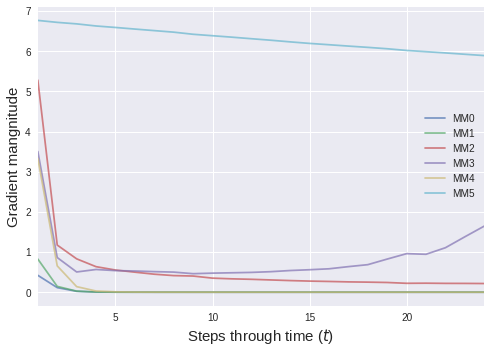

In [0]:
tf.reset_default_graph()
SEQ_LENGTH = 25 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 0 #@param
derivative = 'loss' #@param
initializer = tf.contrib.layers.xavier_initializer()
# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 
inputs=tf.reshape(dummy_input,[1,SEQ_LENGTH,1])
#inputs=tf.unstack(dummy_input,axis=0)
rnn_types=rnn_types = {
   'MM0': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=1000,bc=50),
    'MM1': RNN(1, HIDDEN_UNITS,initializer,inputs,bh=0),# constructor for MM1
    'MM2': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=1,bc=None),
    'MM3': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=5,bc=None),
    'MM4': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=-2,bc=None),
    'MM5': GRU(1, HIDDEN_UNITS,initializer,inputs,bz=5),
    }
#rnn_types=rnn_types = {
 #  'MM1': tf.contrib.rnn.BasicLSTMCell( HIDDEN_UNITS,forget_bias=10)}
   
depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]
grad_norms = {rnn_type: [] for rnn_type in rnn_types}

time_step=tf.shape(dummy_input)[0]

for rnn_type in rnn_types:
 
  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  rnncell=rnn_types[rnn_type]
  
  rnn_output,state= rnncell
  #init_state=basic_cell.zero_state(1,dtype=tf.float32)
  #rnn_output, states = tf.nn.static_rnn(cell=rnncell, initial_state=init_state,inputs=inputs,dtype=tf.float32)
  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  
  rnn_hidden_at_time=rnn_output
  
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
  rnn_output=tf.convert_to_tensor(rnn_output)
  last_hidden =rnn_output[:,-1]
  
  hidden_last_output =tf.reshape(rnn_hidden_at_time[-1],[1,HIDDEN_UNITS])
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b

  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember ]))
  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):

    if derivative  == 'loss':

      current_gradient = tf.gradients(

        loss, 
        
        rnn_hidden_at_time[i],
        
      )
      
    else:
      current_gradient = tf.gradients(

        last_hidden, 

        rnn_hidden_at_time[i],   

      )

    gradients_at_time.append(current_gradient)

  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)
   
  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient mangnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


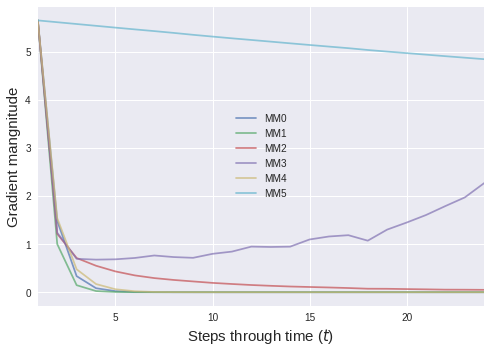

In [0]:
tf.reset_default_graph()
SEQ_LENGTH = 25 #@param
HIDDEN_UNITS = 32 #@param
index_input_to_remember = 0 #@param
derivative = 'Last Hidden Unit' #@param
initializer = tf.contrib.layers.xavier_initializer()
# dummy input sequence
dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 
inputs=tf.reshape(dummy_input,[1,SEQ_LENGTH,1])
#inputs=tf.unstack(dummy_input,axis=0)
rnn_types=rnn_types = {
    'MM0': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=1000,bc=50),
    'MM1': RNN(1, HIDDEN_UNITS,initializer,inputs,bh=0),# constructor for MM1
    'MM2': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=1,bc=None),
    'MM3': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=5,bc=None),
    'MM4': LSTM(1, HIDDEN_UNITS,initializer,inputs,bf=-2,bc=None),
    'MM5': GRU(1, HIDDEN_UNITS,initializer,inputs,bz=5),
    }
#rnn_types=rnn_types = {
 #  'MM1': tf.contrib.rnn.BasicLSTMCell( HIDDEN_UNITS,forget_bias=10)}
   
depths = {rnn_type: [] for rnn_type in rnn_types} # [9, 8, 7, 6, 5, 4, 3, 2, 1]
grad_norms = {rnn_type: [] for rnn_type in rnn_types}

time_step=tf.shape(dummy_input)[0]

for rnn_type in rnn_types:
 
  # --------------------------------------
  # Construct model rnn_types[rnn_type]
  rnncell=rnn_types[rnn_type]
  
  rnn_output,state= rnncell
  #init_state=basic_cell.zero_state(1,dtype=tf.float32)
  #rnn_output, states = tf.nn.static_rnn(cell=rnncell, initial_state=init_state,inputs=inputs,dtype=tf.float32)
  # --------------------------------------
  # Pass input and unroll in time. 
  # i) Record the intermediate hidden states $h_i$ in rnn_hidden_at_time
  
  rnn_hidden_at_time=rnn_output
  
  # ii) Record the last hidden unit and the last output on which we are going to 
  # make the prediction
  #rnn_output=tf.convert_to_tensor(rnn_output)
  
  last_hidden =rnn_hidden_at_time[-1]
  hidden_last_output =tf.reshape(rnn_hidden_at_time[-1],[1,HIDDEN_UNITS])
  
  # Transformation of the RNN output into prediction
  w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
  b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
  model_output = tf.matmul(hidden_last_output, w) + b

  loss = tf.reduce_mean(
    tf.square(model_output-dummy_input[index_input_to_remember ]))
  gradients_at_time = []
  for i in range(1, SEQ_LENGTH):

    if derivative  == 'loss':

      current_gradient = tf.gradients(

        loss, 
        
        rnn_hidden_at_time[i],
        
      )
      
    else:
      current_gradient = tf.gradients(

        last_hidden, 

        rnn_hidden_at_time[i],   

      )

    gradients_at_time.append(current_gradient)

  init = tf.global_variables_initializer()  
  with tf.train.SingularMonitoredSession() as sess:
    sess.run(init)
    gradients = sess.run(gradients_at_time)
  for gid, grad in enumerate(gradients):
    depths[rnn_type].append(len(gradients)-gid)    
    grad_norms[rnn_type].append(np.linalg.norm(grad))

plt.figure()
for rnn_type in depths:
  plt.plot(depths[rnn_type], grad_norms[rnn_type],
           label="%s" % rnn_type, alpha=0.7)
plt.legend()  
plt.ylabel("Gradient mangnitude", fontsize=15)
plt.xlabel("Steps through time ($t$)", fontsize=15)
plt.xlim((1, SEQ_LENGTH-1))
plt.show()

# **Answers 2.3**
* When we increase the length of sentence from 10 to 25, the gradients of MM0, MM1, MM4  all became 0 at last. The gradients of MM0,MM1,MM4 did not change compared to the shorter sentence.Therefore, during training,the loss at first will be high and take longer time to decrese to a low level . 
* The gradient of MM2 with forget bias is 1 falled close to zero for the initial input in the sentence, becuse bias 1 is too small and weak to remeber the previous information.Therefore, in the training process, it  will take a long time to modify its gate weights.

* the gradients of MM5 decreased slightly for the last steps,but still had large gradient for every steps and linearly decreasing compared to other models.That means it can be trained to learn the output fast so it will preform well during the training process with less loss at the beginning of the training..
* The gradient of MM 3 which is the LSTM model with forget bias = 5 also decresed slightly compared to the shorter sentence,but it sill had gradient for every inputs.As the gradient of loss is linearly respect to every last hidden outputs of each step and the magnitude is big, it would take a long time to learn to output the first one and the loss will be high.



 3. **[10 pts]** Based on the intuitions in the last questions, pick two models (one GRU model, one LSTM model) to train the simple memory task of remembering the first input of a sequence.
   * Explain your choice of models and initializations.
   * Train your models on this task and plot your train and testing loss (mean-sq. error).
   * Report (test) accuracy at end of training.
    * Comment on the results you obtained. What happens if we were to increase $n$? What we happen if we trained longer? What if we were trying to predict the $3rd$ symbol read?

  **Inputs**: $\textbf{x} = (x_1, x_2, ..., x_n)$ where $x_i \sim \mathcal{N(0,1)}$ (independently drawn) \\

  **Output (expected)**: $x_1$

  **Training**: 
    * Data: Generate $32*200$ random sequences of length $n=5$ for training and $256$ ones for testing.  
    * Recommended hyperparameters: learning rate $lr=1e-3$, minibatch size = $32$, optimizer = Adam. (Feel free to manipulate these to get the best performance).
 

**Answers:**
* Why this choice ? \\
Based on  the last question, I will choose a GRU with update gate bias to be 2 and a LSTM with forget gate bias to be 5.For GRU, in last question, it is set to be 5 and the gradient for each step is very big which means that it remebers every previous input.Therefore, in this questiion , I will decresea the update bias from 5 to 2.As for the LSTM with forget bias 5, it showed good performance in last question. With these initializations, they will remeber the previous inputs which make it easier to train.

In [0]:
# YOUR CODE HERE
lr=1e-3
tf.reset_default_graph()
def get_data(SEQ_LENGTH=5):  
  dummy_input = [tf.constant([[np.random.normal()]]) for _ in range(SEQ_LENGTH)] 
  return dummy_input
HIDDEN_UNITS = 32
index_input_to_remember = 0 
initializer = tf.contrib.layers.xavier_initializer()
num_sentence=200
batch_size=32
input_size=1
#x=tf.placeholder(tf.float32,[batch_size,5,input_size])
#y_=tf.placeholder(tf.float32,[batch_size,1,input_size])
rnn_types=rnn_types = {   
    'MM0': 1,   
    'MM1': 2,
    }
expected_output=0
train_loss,test_loss, test_accuracy ={rnn_type: [] for rnn_type in rnn_types}, {rnn_type: [] for rnn_type in rnn_types}, {rnn_type: [] for rnn_type in rnn_types}
for rnn_type in rnn_types:
    tf.reset_default_graph()
    
    x=tf.placeholder(tf.float32,[None,5,input_size])
    y_=tf.placeholder(tf.float32,[None,1])
    if rnn_type=='MM0':
        cell=tf.nn.rnn_cell.LSTMCell(num_units=HIDDEN_UNITS,forget_bias=5,dtype=tf.float32)
        xn=tf.unstack(x,axis=1)
        outputs,_=tf.nn.static_rnn(cell,inputs=xn,dtype=tf.float32)
    else:
        outputs,_=GRU(1, HIDDEN_UNITS,initializer,x,bz=2)
    outputs=tf.reshape(outputs[-1],[-1,HIDDEN_UNITS])
    w = tf.Variable(tf.contrib.layers.xavier_initializer()([HIDDEN_UNITS, 1]))
    b = tf.Variable(tf.contrib.layers.xavier_initializer()([1]))
    outputs = tf.matmul(outputs, w) + b
    loss=tf.reduce_mean(tf.square(tf.reshape(outputs,[-1])-tf.reshape(y_, [-1])))
    train_op=tf.train.AdamOptimizer(lr).minimize(loss)
    
    correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(outputs,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))
    with tf.train.MonitoredSession() as sess:
        for step in range(num_sentence) :
            # Update.
            batch_xs=np.random.normal(size=[batch_size,5,1])
            batch_ys=batch_xs[:,expected_output,:]
            #################
            # Training step #
            #################
            _,trainloss,prediction=sess.run([train_op,loss,outputs] , feed_dict={x: batch_xs, y_: batch_ys}) 
            #####################################
             # Compute and storeloss accuracy. #
            #####################################
            train_loss[rnn_type].append(trainloss)
            
           #####################################
           # Compute and store test loss and accuracy.  #
           #####################################
            x_test=np.random.normal(size=[256,5,1])
            y_test=x_test[:,expected_output,:]
            testaccuracy,_,testloss,prediction=sess.run([accuracy,train_op,loss,outputs] , feed_dict={x: x_test, y_: y_test})
            test_loss[rnn_type].append(testloss)
        test_accuracy[rnn_type].append(testaccuracy)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


#comments on the results
As we can see from the results above, the loss of model 1,LSTM with forget gate bias 5, decreased faster than the model 2, GRU with update gate bias 2. Both  models has good performance for the training and testing performance, the test loss were all closed to 0 at the end of training. \\
If we increase the length n, it will take longer time to train the model to decrease the loss to zero. \\
If we could trained longer, the loss will be zero at last. \\
If the predicted out is the 3rd one, the performance for the LSTM will be the same.However, the GRU will give a lower loss at first. As we can see from the question one, the GRU model could remenber every previous  inputs and the 3rd input had more weights in the output than the first one.



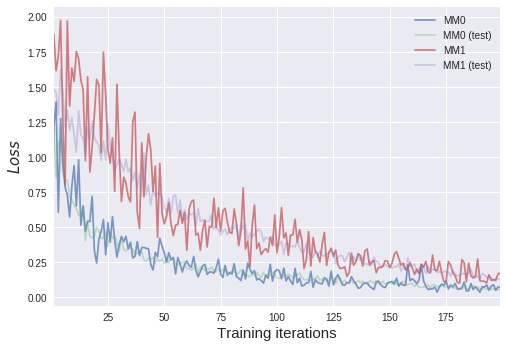

test accuracy is {'MM0': [1.0], 'MM1': [1.0]}


In [0]:
 plt.figure()
 for rnn_type in train_loss:
   plt.plot(train_loss[rnn_type],
            label="%s" % rnn_type, alpha=0.7)
   plt.plot(test_loss[rnn_type],
            label="%s (test)" % rnn_type, alpha=0.3)
 plt.legend()  
 plt.ylabel("$ Loss$", fontsize=15)
 plt.xlabel("Training iterations", fontsize=15)
 plt.xlim((1, 200-1))
 plt.show()
print('test accuracy is',test_accuracy)

## Q3: Meta-learning via LSTM-s (37 pts)
(Credits to Pedro Ortega for insipring the task and insights behind it)

### Task Description

Consider the following generative model: 
* We have $4$ symbols that will be generates from a multinomial/categorical distribution, with parameters $\textbf{p}=(p_1, p_2, p_3)$: symbol 1 is generated with probability $p_1$, symbol 2 is generated with probability $p_2$, symbol 3 with probability $p_3$.
$$X \sim Categorical(3, \textbf{p})$$

* The parameter vector $\textbf{p}$ is drawn from a Dirichlet prior: $$\textbf{p} \sim Dirichlet(\alpha)$$

We are going to use the above to generate sequences (a continuous stream of data/observations), in the following way:
* Step 1: We sample $\textbf{p}$ from the prior
* Step 2: Given this $\textbf{p}$, for $T-1$ time-steps we will generate i.i.d observations by sampling one of the $4$ symbols from the categorical distribution induced by $\textbf{p}$
$$ (X_1, X_2, \cdots X_{T-1}) , s.t. X_i \sim Categorical(3, \textbf{p})$$
* Step 3: At the end of the sequence we append a fourth symbol (RESET): $(X_1, X_2, \cdots X_T, RESET)$
* Step 4: Return to Step 1 and resample $\textbf{p}$. 
* Repeat this 'forever'.

This will give rise to a continuous stream of data, of the form: $ x_1, x_2, \cdots x_{T-1}, RESET, x_{T+1}, x_{T+2}, \cdots x_{2T}, RESET, \cdots, x_{kT+1}, x_{kT+2}, \cdots x_{(k+1)T}, RESET, \cdots$.

Note: Data generation is provided for you in the cell below. (You just need to call the minibatch function to get a sequence of this form).

### Model

We are going to consider an simple LSTM (32 units hidden state) and present this (generated) sequence of data as an input. At each time step $t$ the LSTM will receive one bit of information (gets to observe the symbol corresponding to this time step) and needs to output the probability distribution for the next symbol. Thus, at time $t$ the LSTM get as input the symbol $x_t$ and will return a probability over the next state $P(x_{t+1}| x_{t}, LSTM_{t-1})$.


### Questions

1) **Without running any experiments (5 pts)**, try to think about the following scenarios and answer these questions: 
* Consider we generate the data with $Dirichlet(\alpha)$, where $\alpha = (10.,10.,1.,)$. What do you think the LSTM model will learn, if anything? Remember we are effectively changing the prediction task, every time we are resampling the probability vector $\textbf{p}$. * Hint: Think about the distribution over $\textbf{p}$ that this prior induces. *  

* What if we consider a more uniformative prior, like $\alpha=(1.1, 1.1, 1.1)$?  



* How does this (learning ability and generalization) depend on the length of the tasks $T$ and the unrolling length on the LSTM? It might be helpful to consider the two extremes: 
i) $T=1$ (we reset the task at every time step). What should the model learn in this case?, ii) $T=\infty$ (we sample the task once and keep it forever). What should the model learn in this case? (Answer this for both previous priors)


* Does this increase or decrease the complexity of the prediction problem? What about the ability to generalize to unseen $\textbf{p}$ ?



Answers: 

* The LSTM could manipulate the previous memory which would enable it to be ideal for the prediction.Acording to the  $Dirichlet(\alpha)$, where $\alpha = (10.,10.,1.,)$ , the probability of p1 and p2 is much higher than the p3, so the LSTM will tend to predict more symbol 1 and symbol 2. LSTM will learn fast to predict the  correct results.

* The $\alpha=(1.1, 1.1, 1.1)$ is close to one, so every p is equaly likely.The LSTM would predict the symbols with same probability which means that it tends to predict randomly. Therefore the LSTM will learn slower to predict the correct labels and the accuracy will be lower than the $\alpha = (10.,10.,1.,)$.
* When the T is very short, T=1, p resets every time.Under this situation, when the $\alpha = (10.,10.,1.,)$,although the p resets every time, it still can be perdicted. Therefore the input x would be focused on the label 1 and label 2; It will perform better than generation data with$\alpha=(1.1, 1.1, 1.1)$ but a little bit worse than the longer T. If $\alpha=(1.1, 1.1, 1.1)$,  it will be hard to predict the outcome. As p changes and LSTM predict randomly, the accuracy of prediction will be the lowest and LSTM will learn slow. \\
If the task length T is very long,  $T=\infty$, the input is generated by the same p.This  task will be easier to perform as the p  dosen't change. Under this situation, there is no difference between different generated fuctions.
* •	The LSTM increases the complexity to for the prediction problems. As it will consider the past x and the variables in previous memory state. If we trained a long time, the ability to predict an unseen p will decrease as the LSTM could predict based on the precious memory states. Therefore, the more it is trained, the more confident it is for the prediction result.



2) **Time to check your intuitions (8 pts)** 

Implement a simple LSTM model of $32$ hidden units. This will take as input a one-hot description of the obsevation ($[1,0,0,0]$ for symbol 1. $[0,1,0,0]$ for symbol 2, $[0,0,1,0]$ for symbol 3, $[0,0,0,1]$ for the RESET symbol). This input is fed into the 32-unit LSTM and the LSTM output is processed as follows: $\textrm{Relu} \Rightarrow \textrm{Fully connected Linear Layer }\Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected Linear Layer} \Rightarrow \textrm{Output}$ . The model will be trained by cross-entropy on predicting the next symbol -- thus as opposed to the previous task, we have an output of the model at each time step that is trying to predict the next symbol.

Train the following models:
* T = 5, and T=30 with the data generated from a Dirichlet with $\alpha = (1.,10.,1.)$. Unrolling length for the LSTM = 150. Minibatch size = 64. (M1, M2)
* T = 5, and T=30 with the data generated from a Dirichlet with $\alpha = (1.3, 1.3, 1.3)$ Unrolling length for the LSTM = 150. Minibatch size = 64. (M3, M4)

Train the models for $1000$ iterations ($1000$ minibatches). Record the training and testing preformance (every 10-20 iterations). Plot the curves over training time. What do you observe? (Is this a curve smooth? Do any of them plateau?). **[2x4 pts]**


In [0]:
iterations=1000

NUMHIDDEN=32
input_size=4
batch_size=64
fullyhidden=64
length=150
lr=1e-2
n_symbols = 3
initializer = tf.contrib.layers.xavier_initializer()
def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.1, 1.1, 1.1), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample
  

def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])
model_types = {
    'M1':get_minibatch( 64, 30, 4, None, (1., 10., 1.)),
    'M2':get_minibatch( 64, 5, 29, None, (1., 10., 1.)),
    'M3':get_minibatch( 64, 30, 4, None,(1.3, 1.3, 1.3)),
    'M4': get_minibatch( 64, 5, 29, None,(1.3, 1.3, 1.3)),
    
}
Test_types_M1M3 = {
    'T1':get_minibatch( 1, 30, 4, None, (1., 10., 1.)),
    'T2':get_minibatch( 1, 30, 4, None,(1.3, 1.3, 1.3)),
    'T3':get_minibatch(1, 30, 4, p=(0,0,1)),
    'T4': get_minibatch(1, 30, 4, None,(0.2, 0.2, 0.2)),   
}
Test_types_M2M4 = {
    'T1':get_minibatch( 1, 5, 29, None, (1., 10., 1.)),
    'T2':get_minibatch( 1, 5, 29, None,(1.3, 1.3, 1.3)),
    'T3':get_minibatch(1, 5, 29, p=(0,0,1)),
    'T4': get_minibatch(1, 5, 29, None,(0.2, 0.2, 0.2)),   
}
train_loss,test_loss, test_accuracy,train_accuracy ={model: [] for model in model_types}, {model: [] for model in model_types}, {model: [] for model in model_types},{model: [] for model in model_types}
for model in model_types:
    tf.reset_default_graph()
    
    x=tf.placeholder(tf.float32,[None,input_size])
    y_=tf.placeholder(tf.float32,[None,input_size]) 
    input=tf.reshape(x,[-1,length,input_size]) 
    cell=tf.contrib.rnn.BasicLSTMCell(NUMHIDDEN)
    #init_state=cell.zero_state(batch_size,dtype=tf.float32)
    
    output,final_states=tf.nn.dynamic_rnn(cell, input, dtype=tf.float32) 
   
    output=tf.reshape(output[:,0:-1,:],[-1,NUMHIDDEN])
   
    h_1 = tf.nn.relu(output)
    Wf_1 = tf.Variable(initializer([NUMHIDDEN, fullyhidden]))
    bf_1 =  tf.Variable(initializer([fullyhidden]))
    hf_1 = tf.matmul(h_1, Wf_1) + bf_1
    
    h_2 = tf.nn.relu(hf_1)
    Wf_2 = tf.Variable(initializer([fullyhidden, 4]))
    bf_2 =  tf.Variable(initializer([4]))
    pred = tf.matmul(h_2, Wf_2) + bf_2
    y=tf.nn.softmax(pred)
    #pred=tf.matmul(output,w_out)+b_out
    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=pred))
    trainstep=tf.train.AdamOptimizer(lr).minimize(loss)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    trainx,testx=[],[]
    for i in range(1000): 
        trainx.append(model_types[model])
    trainx=np.array(trainx)
    trainy=trainx[:,:,1:,:]
    
    for i in range(50):
        testx.append(model_types[model])
    testx=np.array(testx)
    
    saver = tf.train.Saver() 
    checkpoint_dir=model
    init = tf.global_variables_initializer()
    sess_config = tf.ConfigProto(allow_soft_placement=True,log_device_placement=True)
    sess = tf.Session(config=sess_config)
    sess.run(init)
    Train=True
        
        ####predict####
    test_predict=[]
    if Train==True:
        for step in range ( iterations):

            trainx_batch=trainx[step:step+1]
            
            trainy_batch=np.reshape(trainx_batch[:,:,1:,:],[-1,input_size])
            
            trainx_batch=np.reshape(trainx_batch,[-1,input_size])
            
            sess.run([trainstep] , feed_dict={x: trainx_batch, y_: trainy_batch})
            
            if step% 20== 0:
                #####################################
                # Compute and store train accuracy. #
                #####################################
                trainlen=int(trainx.shape[0]*0.5)
                #train_x=trainx[0:trainlen]
                #train_y=train_x[:,:,1:,:]
                train_y=np.reshape(trainy,[-1,input_size])
                train_x=np.reshape(trainx,[-1,input_size])
                trainaccuracy,trainloss=sess.run([accuracy,loss] , feed_dict={x: train_x, y_: train_y})
                train_loss[model].append(trainloss)
                train_accuracy[model].append(trainaccuracy)
                
                test_y=np.reshape(testx[:,:,1:,:],[-1,input_size])
                test_x=np.reshape(testx,[-1,input_size])
                testaccuracy,testloss=sess.run([accuracy,loss] , feed_dict={x: test_x, y_: test_y})
                test_loss[model].append(testloss)
                test_accuracy[model].append(testaccuracy)
        saver.save(sess,model)

    

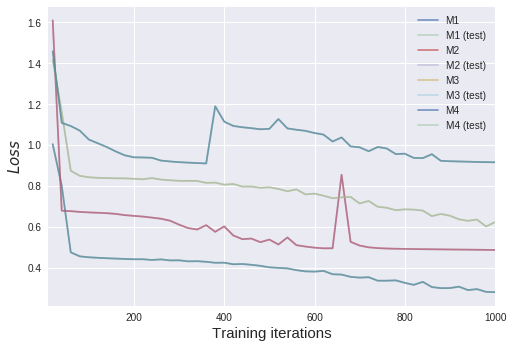

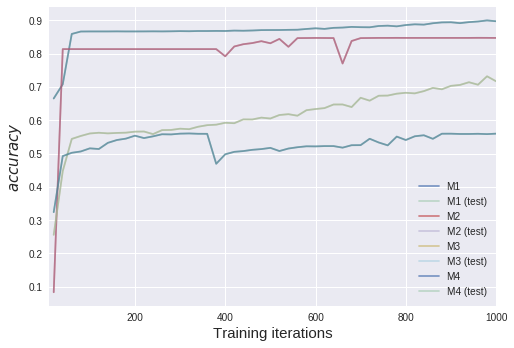

In [0]:
 
 plt.figure()
 for model in train_loss:
   xs = [x * 20 for x in range(1, len(train_loss[model])+1)]
   plt.plot(xs,train_loss[model],
            label="%s" % model, alpha=0.7)
   plt.plot(xs,test_loss[model],
            label="%s (test)" % model, alpha=0.3)
 plt.legend()  
 plt.ylabel("$ Loss$", fontsize=15)
 plt.xlabel("Training iterations", fontsize=15)
 plt.xlim((10, iterations-1))
 plt.show()
 plt.figure()
 for model in train_accuracy:
   xs = [x * 20 for x in range(1, len(train_accuracy[model])+1)]
   plt.plot(xs,train_accuracy[model],
            label="%s" % model, alpha=0.7)
   plt.plot(xs,test_accuracy[model],
            label="%s (test)" % model, alpha=0.3)
 plt.legend()  
 plt.ylabel("$ accuracy$", fontsize=15)
 plt.xlabel("Training iterations", fontsize=15)
 plt.xlim((10, iterations-1))
 plt.show()
    


## Coments on the results above
As we can see from the results above, the test curve is coincided with the training curve, which is because that we have trained our model on a long time, the tiny difference is invisible compared to the large deference between models. 
Given the loss curve, it can be indicated that the M1 performed best at last and M4 performed worse, which is not as expected in question1. In our previous expectation, the M2 with T=30 should perform better than the M1 with T=5. It can be seen that, at first, the M2 indeed performed the best as its loss decreased fast. However, at about 15 steps, the loss the M2 stopped decrease and remained at the same level, while the M1 continued to train and give better performance. \\

 Compared M4 with M3, the M4 also perform better than the M3, and M3 had the highest loss before about 25 training time. After that point, the loss of M4 stopped decreased and M3 continued to decrease.  \\
 
The curve is smooth for M1 and M3, we can see that M1 has reached the plateau with low loss, and the M3 also decreased gradually. However, curves for the M2 and M4 are unstable, especially for M4 model, the loss was very fluctuating. For M2, there was a big peak at about 750 steps which was strange and the loss increased slightly after that peak.


3) **Analysis results (10 pts)**

In this section, we will investigate what the models have actaully learnt. For this we will generate a few test sequences:
* *Test sequence 1*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.,10.,1.,)$.
* *Test sequence 2*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.3,1.3,1.3,)$.
* *Test sequence 3*: generate a test sequence that 'changes tasks' every T=5 steps, but keep sampling according to the same probability vector $\textbf{p}=(0,0,1)$ (You can use any of the extreme here).
* *Test sequence 4*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (0.2,0.2,0.2)$.

i) Test the preformance of M1 and M3 and these test sequences. In addition plot the actual prediction the models do (probability of symbols over time). This should give you more insight in what the model does. Does this correspond or contradict your previous intuitions? **[5 pts]**

ii) Repeat the same procedure for task length $T=30$ and models M2 and M4. What do you observe? How do M2 and M4 compare to each other and how to their compare to M1 and M3 (the models trained on the shorter task length). **[5 pts]**


In [0]:
NUMHIDDEN=32
input_size=4
batch_size=64
fullyhidden=64
length=150
lr=1e-2
n_symbols = 3
initializer = tf.contrib.layers.xavier_initializer()
def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.1, 1.1, 1.1), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample
  

def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])
Test_types_M1M3 = {
    'T1':get_minibatch( 1, 30, 4, None, (1., 10., 1.)),
    'T2':get_minibatch( 1, 30, 4, None,(1.3, 1.3, 1.3)),
    'T3':get_minibatch(1, 30, 4, p=(0,0,1)),
    'T4': get_minibatch(1, 30, 4, None,(0.2, 0.2, 0.2)),   
}
Test_types_M2M4 = {
    'T1':get_minibatch( 1, 5, 29, None, (1., 10., 1.)),
    'T2':get_minibatch( 1, 5, 29, None,(1.3, 1.3, 1.3)),
    'T3':get_minibatch(1, 5, 29, p=(0,0,1)),
    'T4': get_minibatch(1, 5, 29, None,(0.2, 0.2, 0.2)),   
}
model_types = {
    'M1':get_minibatch( 64, 30, 4, None, (1., 10., 1.)),
    'M2':get_minibatch( 64, 5, 29, None, (1., 10., 1.)),
    'M3':get_minibatch( 64, 30, 4, None,(1.3, 1.3, 1.3)),
    'M4': get_minibatch( 64, 5, 29, None,(1.3, 1.3, 1.3)),
    
}

for i in range(1):
    tf.reset_default_graph()
    
    x=tf.placeholder(tf.float32,[None,input_size])
    y_=tf.placeholder(tf.float32,[None,input_size]) 
    input=tf.reshape(x,[-1,length,input_size]) 
    cell=tf.contrib.rnn.BasicLSTMCell(NUMHIDDEN)
    #init_state=cell.zero_state(batch_size,dtype=tf.float32)
    
    output,final_states=tf.nn.dynamic_rnn(cell, input, dtype=tf.float32) ###CHECH OUTPUT SHAPE
   
    output=tf.reshape(output[:,0:-1,:],[-1,NUMHIDDEN])
   
    h_1 = tf.nn.relu(output)
    Wf_1 = tf.Variable(initializer([NUMHIDDEN, fullyhidden]))
    bf_1 =  tf.Variable(initializer([fullyhidden]))
    hf_1 = tf.matmul(h_1, Wf_1) + bf_1
    #W_2 = tf.Variable(initializer([1,fullyhidden]))
    #b_2 =  tf.Variable(initializer([fullyhidden]))
    h_2 = tf.nn.relu(hf_1)
    Wf_2 = tf.Variable(initializer([fullyhidden, 4]))
    bf_2 =  tf.Variable(initializer([4]))
    pred = tf.matmul(h_2, Wf_2) + bf_2
    y=tf.nn.softmax(pred)
    #pred=tf.matmul(output,w_out)+b_out
    init = tf.global_variables_initializer()
    sess_config = tf.ConfigProto(allow_soft_placement=True,log_device_placement=True)
    sess = tf.Session(config=sess_config)
    sess.run(init)
    Train=False
    saver = tf.train.Saver()   
        ####predict####

    test_prediction_M1,test_prediction_M3,test_prediction2_M2,test_prediction2_M4 ={test: [] for test in Test_types_M1M3},{test: [] for test in Test_types_M2M4},{test: [] for test in Test_types_M1M3},{test: [] for test in Test_types_M2M4}
    for test in Test_types_M1M3:
        TextX=Test_types_M1M3[test]
        testX=np.array(TextX)    
        test_X=np.reshape(testX,[-1,input_size])
        for model in ('M1','M3'):
            if model=='M1':
                saver.restore(sess,"M1model.ckpt-50")
                test_prediction_M1[test].append(sess.run(y, feed_dict={x: test_X} ))
            else:
                saver.restore(sess,"M3model.ckpt-50")
                test_prediction_M3[test].append(sess.run(y, feed_dict={x: test_X} ))
    for test in Test_types_M2M4:
        TextX=Test_types_M2M4[test]
        testX=np.array(TextX)   
        test_X=np.reshape(testX,[-1,input_size])
        for model in ('M2','M4'):
            if model=='M2':
                saver.restore(sess,"M2model.ckpt-50")
                test_prediction2_M2[test].append(sess.run(y, feed_dict={x: test_X} ))
            else:
                saver.restore(sess,"M4model.ckpt-50")
                test_prediction2_M4[test].append(sess.run(y, feed_dict={x: test_X} ))
            

INFO:tensorflow:Restoring parameters from M1model.ckpt-50
INFO:tensorflow:Restoring parameters from M3model.ckpt-50
INFO:tensorflow:Restoring parameters from M1model.ckpt-50
INFO:tensorflow:Restoring parameters from M3model.ckpt-50
INFO:tensorflow:Restoring parameters from M1model.ckpt-50
INFO:tensorflow:Restoring parameters from M3model.ckpt-50
INFO:tensorflow:Restoring parameters from M1model.ckpt-50
INFO:tensorflow:Restoring parameters from M3model.ckpt-50
INFO:tensorflow:Restoring parameters from M2model.ckpt-50
INFO:tensorflow:Restoring parameters from M4model.ckpt-50
INFO:tensorflow:Restoring parameters from M2model.ckpt-50
INFO:tensorflow:Restoring parameters from M4model.ckpt-50
INFO:tensorflow:Restoring parameters from M2model.ckpt-50
INFO:tensorflow:Restoring parameters from M4model.ckpt-50
INFO:tensorflow:Restoring parameters from M2model.ckpt-50
INFO:tensorflow:Restoring parameters from M4model.ckpt-50


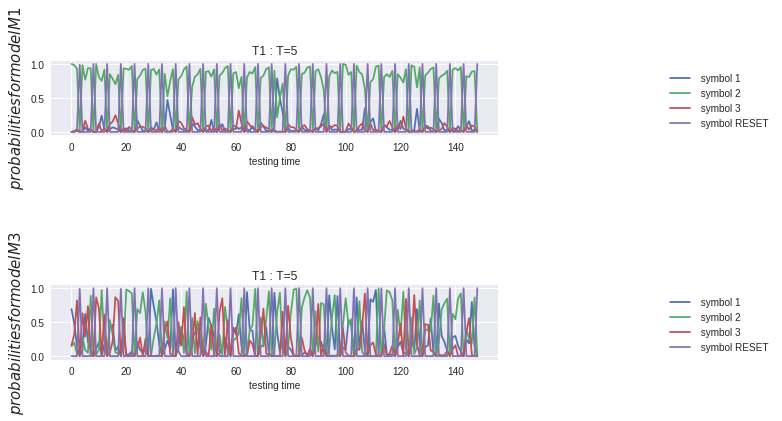

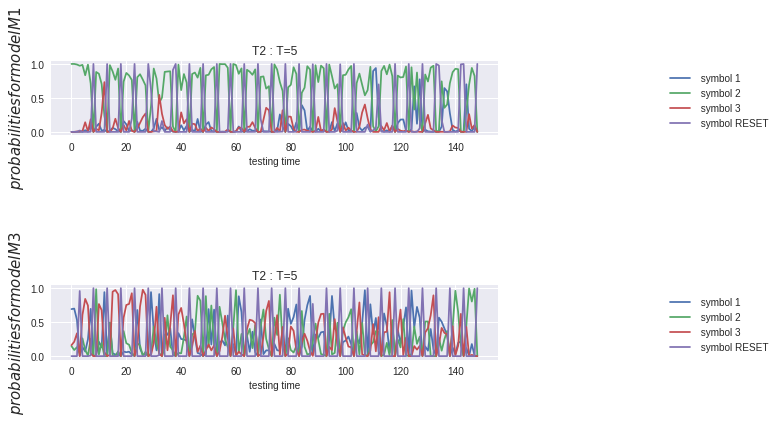

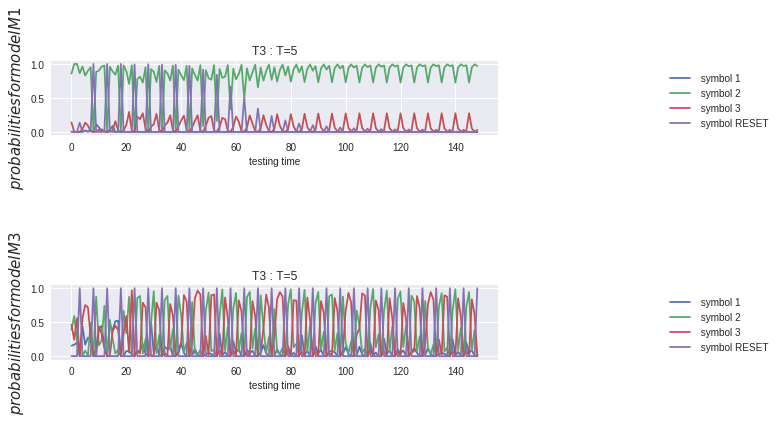

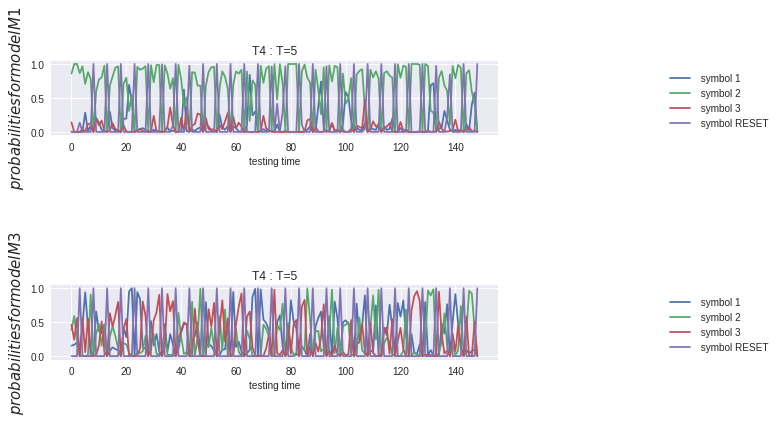

In [0]:
symbol_types = {
    '1':0,
    '2':1,
    '3':2,
    'RESET': 3,   
}

for test in test_prediction_M1:
    plt.figure()
    m=1
    
    for model in ('M1','M3'):  
        plt.subplot(2,1,m) 
        if model=='M1':
            testpre=test_prediction_M1[test][0]
            for i in symbol_types:
                
                plt.plot(testpre[:,symbol_types[i]],
                label=" symbol %s "%(i))
                plt.title('%s : T=5'%test)
               
        else:
            testpre=test_prediction_M3[test][0]
            
            for i in symbol_types:
                plt.plot(testpre[:,symbol_types[i]],
                label=" symbol %s "%(i))
                plt.title('%s : T=5'%test)
        plt.legend(loc='upper center', bbox_to_anchor=(1.5,0.95),ncol=1,fancybox=True,shadow=True)
        plt.ylabel("$ probabilities for model %s$"%model, fontsize=15)
        plt.xlabel("testing time", fontsize=10)
        m=m+1  
    
    plt.subplots_adjust(wspace =2, hspace =2)
    
    #plt.xlim((10, len(testpre[0])))

plt.show()
  



## comments on the results above
From results above, we can see that for sentence T1, T2, and T4, the M1 shows similarly results as well as M3 for these three types of sentences. For M1, most predictions are symbol 2 and for M 3 these three symbols are predicted almost with the same probabilities. For sentence T3, M1 model still predicted symbol 2 with high probability while probability of symbol 3 gradually increase. For the M3, it gave higher probability for symbol 3 compared to other sentences. \\

Therefore, we could infer that the M1 tended to predict symbol 2 more often and M3 is tend to predict the symbols randomly. This conclusion is corresponding to my previous intuitions.


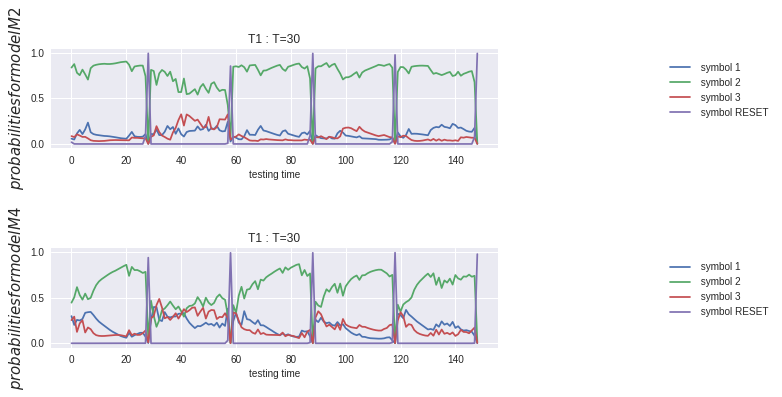

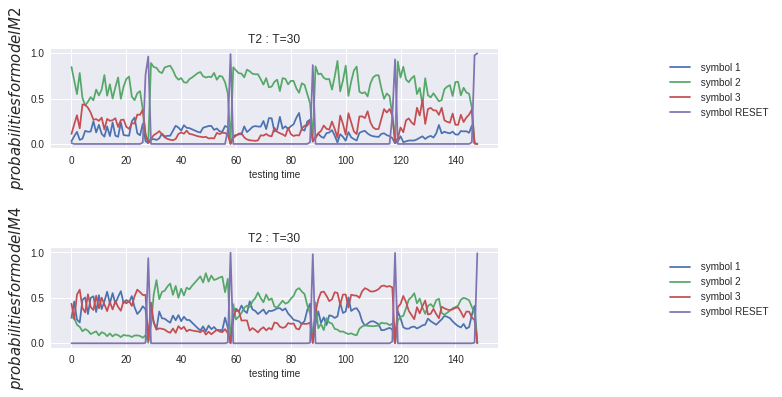

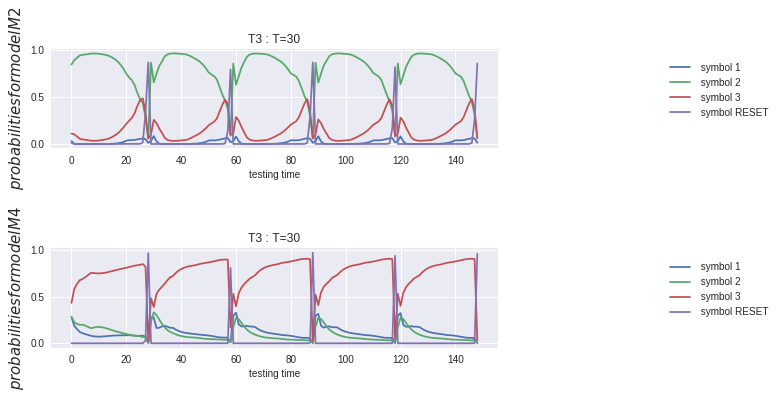

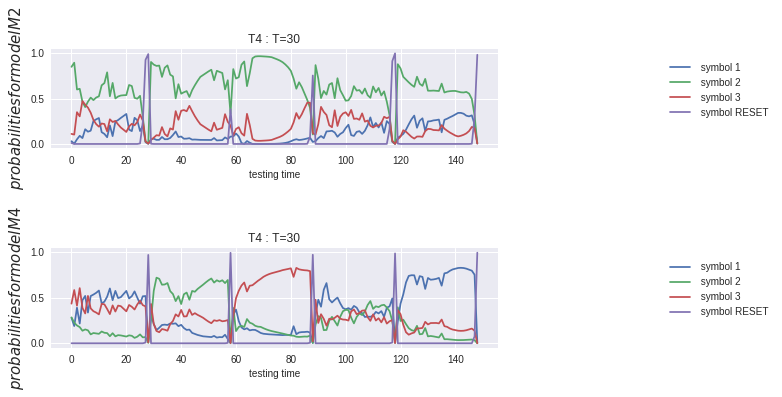

In [0]:


symbol_types = {
    '1':0,
    '2':1,
    '3':2,
    'RESET': 3,   
}
for test in test_prediction2_M2:
    plt.figure()
    m=1
    for model in ('M2','M4'):  
        plt.subplot(2,1,m) 
        if model=='M2':
            testpre=test_prediction2_M2[test][0]
            
            for i in symbol_types:
                plt.plot(testpre[:,symbol_types[i]],
                label=" symbol %s "%(i))
                plt.title('%s : T=30'%test)
        else:
            testpre=test_prediction2_M4[test][0]
            
            for i in symbol_types:
                plt.plot(testpre[:,symbol_types[i]],
                label=" symbol %s "%(i))
                plt.title('%s : T=30'%test)
        plt.legend(loc='upper center', bbox_to_anchor=(1.5,0.95),ncol=1,fancybox=True,shadow=True)
        plt.ylabel("$ probabilities for model %s$"%model, fontsize=15)
        plt.xlabel("testing time", fontsize=10)
        m=m+1  
    
    plt.subplots_adjust(wspace =2, hspace =1)
    
    #plt.xlim((10, len(testpre[0])))

plt.show()
  

## comments on the results
From the results above, compared M2 with M4, for T1, both models could predict symbol 2 more often than other symbols. For T2, where symbols are drawn randomly, the M4 would predict symbols randomly, but M2 still focused on the symbol 2. For T3, where the p is fixed, M4 could predict the symbol 3 with high probability; M2 still give high probability for symbol 2, while the probability of symbol2 decreased and probability of symbol3 increased at each reset point. For T4, M2 gave high probability for symbol 2 and M4 could choose one symbol for each task. \\

Compared to the shorter length, the model could give a more confident prediction for each task. This performance is also corresponding to the previous assumption.  


4) **Comparison to the Bayesian update (14 pts)**


Going back to the generative process in the task description. For a given prior, for each the mini-tasks (selecting/sampling a $\textbf{p}$), one could compute the Bayesian posterior at each time step.  We start with a prior and every time we observe a symbol with update our posterior over the parameters
 $\textbf{p}$ given the data. We do this every time step, till we reach the RESET symbol which marks the end of the task. Then we start again, from the prior.
,

i) Derive the posterior update for each time step. (Hint: since the two distribution are conjugates or each other, the posterior has a closed form). **[2 pts]**

ii) Implement this posterior update and use it to infer the probabilities over the next symbol, for the previously generated test sequences. This will tell you, what the inferred probabilities would be, if we knew the structure of the model, the prior and that the reset symbol means the tasks has finished and we should reset our estimate to the prior. (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 and 4 compute the updates starting from both priors) **[5 pts]**

iii) Compare this to what the LSTM predictions are. What do you observe? What are the failure cases -- can you explain why this might happen? (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 and 4 compute the updates starting from both priors). **[7 pts]**
 
For this analysis, only consider $T=30$ and respectively models M2 and M4.


Answers:


i) The Dirichlet distribution is the conjugate prior of the categorical distribution, therefore the posterior of X will also be Dirichle ditrbution.  $P(p)=Dirichlet(\alpha)=p(\boldsymbol{p} | \boldsymbol{\alpha})=\frac{\Gamma\left(\sum_{k} \alpha_{k}\right)}{\prod_{k} \Gamma\left(\alpha_{k}\right)} \prod_{k} p_{k}^{\alpha_{k}-1}$ \\
$p\left(X=x_{k} | \alpha\right)=p_{k}$Therefore, $P(p|x=x_k)\propto P(x=x_k|p)P(p)$\begin{aligned} &= p_{k} \times \frac{\Gamma\left(\sum_{k} \alpha_{k}\right)}{\prod_{k} \Gamma\left(\alpha_{k}\right)} \prod_{k} p_{k}^{\alpha_{k}-1} \\ &=\frac{\Gamma\left(\sum_{k} \alpha_{k}\right)}{\prod_{k} \Gamma\left(\alpha_{k}\right)}p_k \prod_{k} p_{k}^{\alpha_{k}-1} =Dirichlet(p|1+\alpha_k)\end{aligned}  \\



In [0]:
iterations=1000

NUMHIDDEN=32
input_size=4
batch_size=64
fullyhidden=64
length=150
lr=1e-2
n_symbols = 3
initializer = tf.contrib.layers.xavier_initializer()
def get_data_per_task_ba(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.1, 1.1, 1.1), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  
  return sample
  

def get_data_ba(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task_ba(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])
Test_types_BA= {
    'T1': (1., 10., 1.),
    'T2':(1.3, 1.3, 1.3),
      
}


batest_prediction ={test: [] for test in Test_types_BA}
for test in Test_types_BA:
    for i in range(5):
        #if i==0 and test=='T3':
        #    x=get_data_ba(1,1,p=(0,0,1))
         #   alpha=(1.3,1.3,1.3)
          #  alpha=list(alpha)
       # elif i==0 and test=='T4':
        #    x=get_data_ba(1,1,p=(0.2,0.2,0.2))
         #   alpha=list((0.2,0.2,0.2))
            
      
        x=get_data_ba(1,1,None,Test_types_BA[test])
        alpha=list(Test_types_BA[test])
        batest_prediction[test].append(x)
        for T in range(29):
            if T==29:
                batest_prediction[test].append([[0,0,0,1]])
            else:
                ad=np.argmax(x)
                alpha[ad]=alpha[ad]+1
               
                x=get_data_ba(1,1,None,tuple(alpha))
                batest_prediction[test].append(x)
    batest_prediction[test]=np.concatenate(batest_prediction[test])    
                
            
            
            
        
    

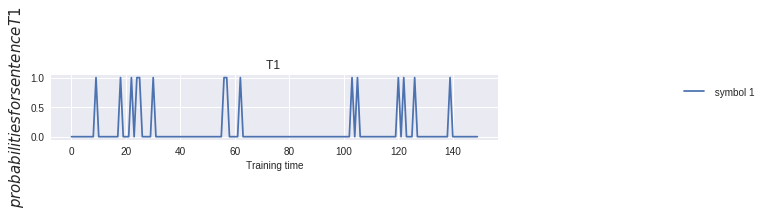

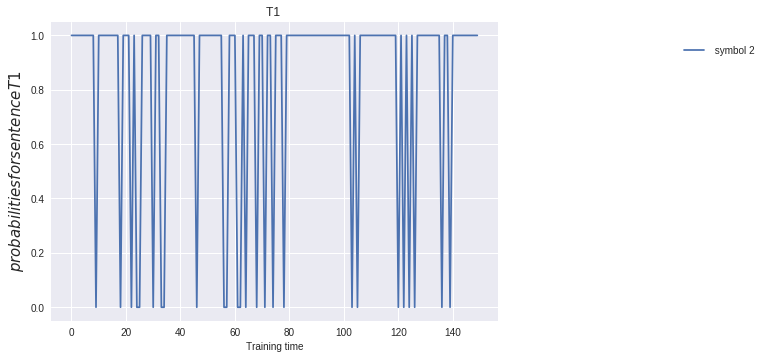

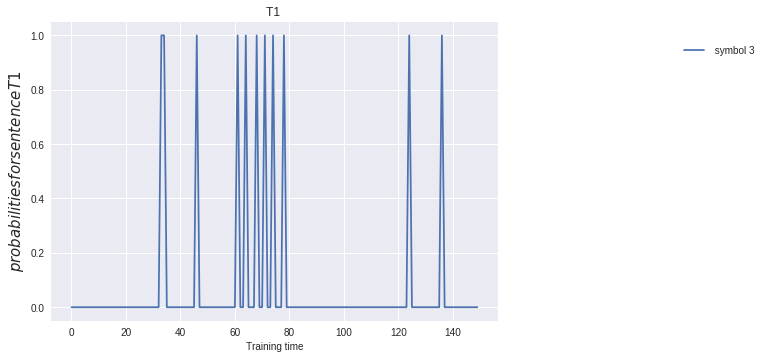

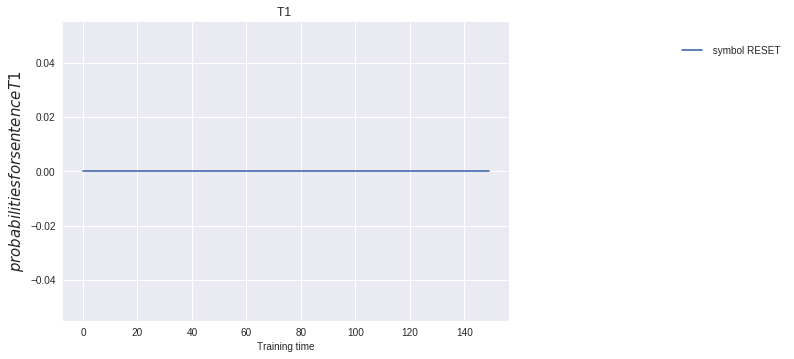

<Figure size 576x396 with 0 Axes>

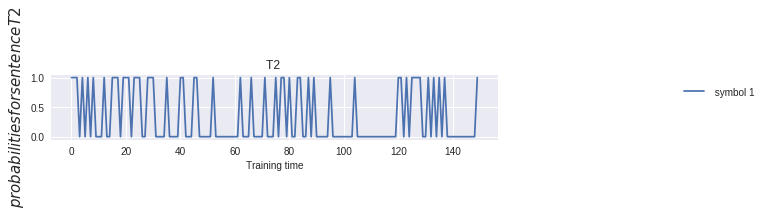

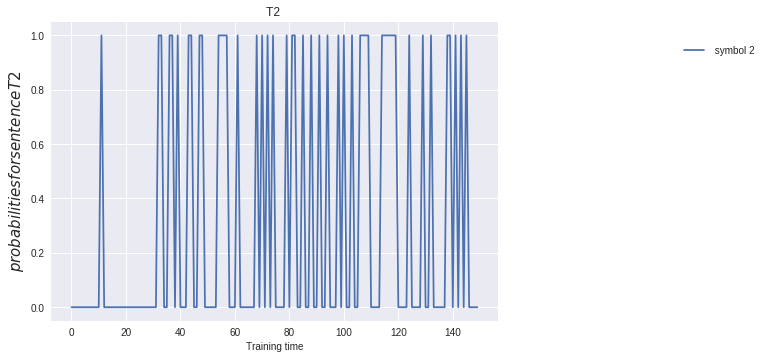

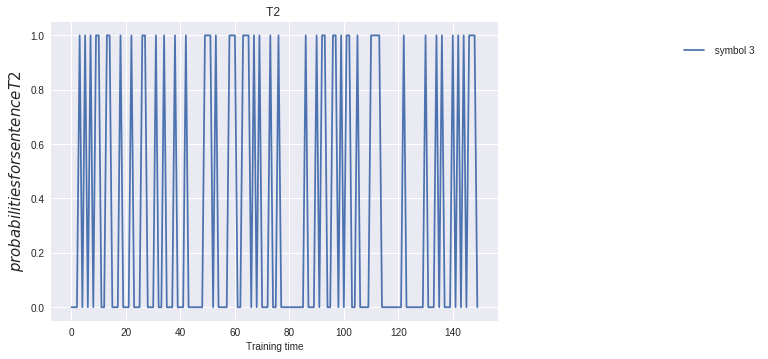

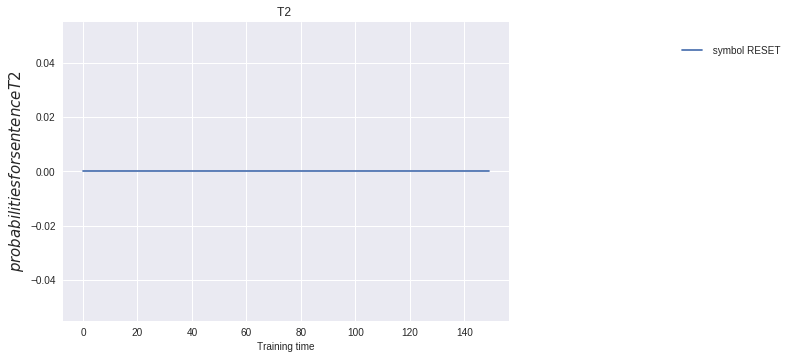

<Figure size 576x396 with 0 Axes>

In [0]:
symbol_types = {
    '1':0,
    '2':1,
    '3':2,
    'RESET': 3,   
}

for test in batest_prediction:
    plt.figure()
    m=1
    plt.subplot(4,1,m)
    for i in symbol_types:
         
        plt.plot(batest_prediction[test][:,symbol_types[i]],
        label=" symbol %s "%(i))
        plt.title('%s '%test)
        plt.legend(loc='upper center', bbox_to_anchor=(1.5,0.95),ncol=1,fancybox=True,shadow=True)
        plt.ylabel("$ probabilities for sentence %s$"%test, fontsize=15)
        plt.xlabel("Training time", fontsize=10)
        m=m+1  
        plt.show()
    plt.subplots_adjust(wspace =2, hspace =0)




1)	For sentence T1, Bayesian generated symbol2 mostly and compared with M2 and M4, they have similar prediction. For sentence T2, Bayesian gave prediction randomly which has same performance as M4. 
